In [1]:
# importing libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib.image as mpimg

In [2]:
#GPU availability check

print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [3]:
#setting up the data directory

import pathlib
import os


dataset_path = "/home/kevin/Downloads/NEU-DET"
data_dir = pathlib.Path(dataset_path)
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

In [4]:
train_dir

'/home/kevin/Downloads/NEU-DET/train'

In [5]:
# parameter setting

batch_size=30
img_height=200
img_width=200

In [6]:
# train data generator


image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                class_mode='categorical',
                                                shuffle=True, 
                                                color_mode='grayscale',
                                                target_size=(img_width,img_height)
                                                )

Found 1440 images belonging to 6 classes.


In [7]:
# validation data directory

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 class_mode='categorical',
                                                 shuffle=True, 
                                                 color_mode='grayscale',
                                                 target_size=(img_width,img_height),                                                  
                                                )

Found 360 images belonging to 6 classes.


In [8]:
# model building

model = tf.keras.Sequential()

model.add(Conv2D(8, 3, padding='same', activation='relu', input_shape=(img_width,img_height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

In [9]:
#printing model summary

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0

In [10]:
# compiling the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy']) 

In [11]:
# training the model

epochs = 20

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= int(np.ceil(val_data_gen.n / float(batch_size)))
) 

/home/kevin/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
48/48 [==============================] - 9s 146ms/step - loss: 1.6613 - categorical_accuracy: 0.2556 - val_loss: 1.4485 - val_categorical_accuracy: 0.4778
Epoch 2/20
48/48 [==============================] - 7s 141ms/step - loss: 1.0704 - categorical_accuracy: 0.6132 - val_loss: 1.1150 - val_categorical_accuracy: 0.5528
Epoch 3/20
48/48 [==============================] - 7s 143ms/step - loss: 0.7094 - categorical_accuracy: 0.7708 - val_loss: 0.8513 - val_categorical_accuracy: 0.6278
Epoch 4/20
48/48 [==============================] - 7s 143ms/step - loss: 0.5660 - categorical_accuracy: 0.8069 - val_loss: 1.3053 - val_categorical_accuracy: 0.5472
Epoch 5/20
48/48 [==============================] - 7s 142ms/step - loss: 0.5191 - categorical_accuracy: 0.8278 - val_loss: 1.6868 - val_categorical_accuracy: 0.5417
Epoch 6/20
48/48 [==============================] - 7s 143ms/step - loss: 0.4855 - categorical_accuracy: 0.8438 - val_loss: 1.5003 - val_categorical_accuracy: 0.5500
Epoc

Text(0.5, 1.0, 'Training and Validation Accuracy')

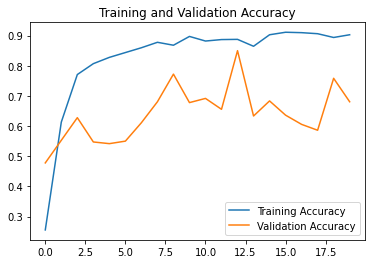

In [12]:
# plotting the accuracy and loss

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')